#### Predict Price of flights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Reading the data
train_data = pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# Checking for null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Since only 1 values null we can remove it
train_data.dropna(inplace=True)

In [8]:
# Since all the data except price is in object dataType, so convert it
# Eg:
train_data["Duration"].value_counts()
# Convert hr and min to numerical data. For that we do Exploratory Data Analysis

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
31h 50m      1
27h 30m      1
32h 55m      1
31h 30m      1
40h 20m      1
Name: Duration, Length: 368, dtype: int64

## Exploratory Data Analysis

Since the date_of_journey is in object datType(/ /) format, we cant use it for data anlaysis. So convert it to timestamp data.

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [9]:
# Convert date_of_journey into individuals term like day, date, month, time
train_data["J_Day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["J_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [10]:
train_data.head()
# Now drop the Date_of_journey column
train_data.drop(["Date_of_Journey"], axis=1,inplace=True)

In [11]:
# Correct the dep_hour and dep_min
train_data["Dep_hr"] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute

# Now drop the departure column
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [12]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_month,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [13]:
# Follow similar process for the arrival time
train_data["Arr_hr"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arr_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Drop the arrival_time col
train_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [14]:
train_data.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,5,10,55,19,15


In [15]:
# Now we have to extract the duration time in separae cols in hrs and minutes
# Duration of flight is the difference between departure and arrival time
# If duration consists only hr then minutes will be 0 and same as for hr case

# Traverse each entry of the duration coumn and check if only hr or not
duration_col = list(train_data["Duration"])
# duration_col

d_hrs=[]
d_mins=[]
# Now for every entry of the list extract data
for everyItem in duration_col:
    if "h" not in everyItem:
        d_hrs.append(int(0))
        if len(everyItem)==2:
            d_mins.append(int(everyItem[0]))
        else:
            d_mins.append(int(everyItem[0:2]))
    elif "m" not in everyItem:
        d_mins.append(int(0))
        if len(everyItem)==2:
            d_hrs.append(int(everyItem[0]))
        else:
            d_hrs.append(int(everyItem[0:2]))
    else:
        hrs,mins = everyItem.split(" ")
        if len(hrs)==2:
            d_hrs.append(int(hrs[0]))
            if len(mins)==2:
                d_mins.append(int(mins[0]))
            else:
                d_mins.append(int(mins[0:2]))
        else:
            d_hrs.append(int(hrs[0:2]))
            if len(mins)==2:
                d_mins.append(int(mins[0]))
            else:
                d_mins.append(int(mins[0:2]))


In [16]:
# Add duration hrs and mins
train_data["Duration_hours"] = d_hrs;
train_data["Duration_mins"] = d_mins;

In [17]:
# Drop the duration col
train_data.drop(["Duration"],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Coding for categorical data

As we know there are two types of categorical data available:<br>
 ♦ __<font color=blue>Ordinal Data:</font>__ orderized data(i.e. data can be compared)( Label Encoder from sklearn) used when we want labels like 0,1,2<br>
 ♦ __<font color=blue>Nominal Data:</font>__ randomized order data(use one hot encoding)

In [19]:
# For Airlines
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

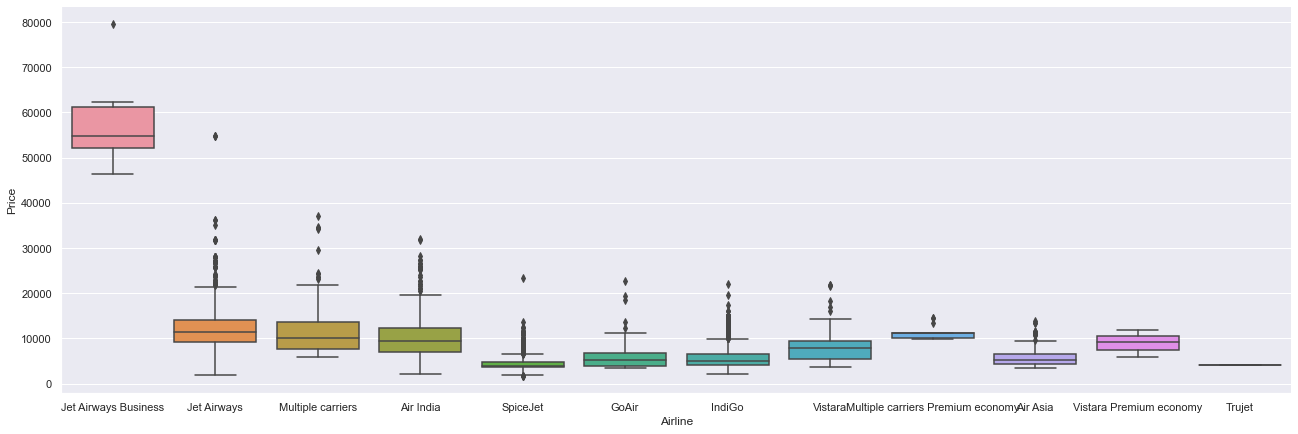

In [20]:
# Boxplot the airline with price
sns.catplot(x="Airline", y="Price",data=train_data.sort_values("Price", ascending=False),kind="box",height=6, aspect=3)
plt.show()

In [21]:
# One hot encoding for Airlines
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
# Drop_first drops a column which ca be represented by all the other cols
Airline.head(5)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


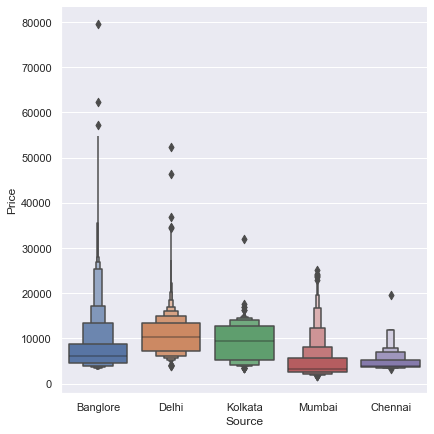

In [22]:
#  Do the same procedure for Source and destination
# Sourec vs Price
sns.catplot(x="Source", y="Price", data=train_data.sort_values("Price", ascending=False),kind="boxen", height=6)

In [23]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head(5)
# Here banglore source is dropped as it can be shown with the 4 cols when all 4 zero means banglorw 1

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
# Same for Destination
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
# Here Delhi and New Delhi are given separate but in the route both are represented by DEL
train_data["Destination"] = train_data["Destination"].replace("New Delhi","Delhi")
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

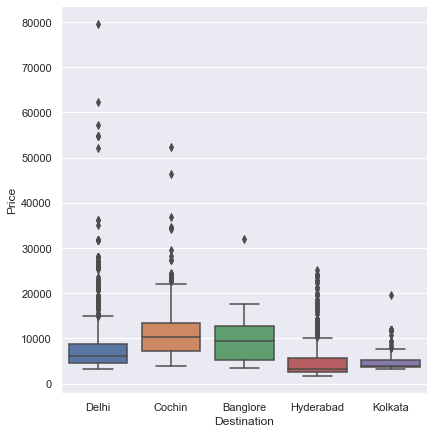

In [26]:
sns.catplot(x="Destination",y="Price", data= train_data.sort_values("Price", ascending=False), kind="box", height=6)

In [27]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head(5)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [28]:
# Route data
train_data["Route"].value_counts()
# As route defines the number of stops between source and destination. so its better to use total stops col
train_data.drop(["Route"], axis=1, inplace=True)

In [29]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
# Checking the adiitional_info col
train_data["Additional_Info"].describe()
# As most of the value is no-info so we can drop it
train_data.drop(["Additional_Info"], axis=1, inplace=True)

In [31]:
train_data.head(5)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [32]:
# For Total stops we have no-stops(0), 1 stop, 2 stop, 3 stop. So the order is maintained
# Perform label encoder
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
# Using sklearn label encoder it gives priority according to its inbuilt algo
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
 
# # Encode labels in column Total_Stops
# train_data['Total_Stops']= label_encoder.fit_transform(train_data["Total_Stops"])
# train_data["Total_Stops"].value_counts()

# Method 2:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [34]:
train_data.head(5)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
# Now drop the updated columns and combine all the updated data
train_data.drop(["Airline","Source","Destination"], axis=1, inplace=True)
updated_trainData = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [36]:
# print(pd.DataFrame(updated_trainData))
updated_trainData.shape

(10682, 29)

## Data Preprocessing for Test Data

In [37]:
test_data = pd.read_excel("./Test_set.xlsx")

In [38]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [39]:
# Now do the same things for test data as did for train data

# Journey col
test_data["J_Day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["J_month"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Departure Time
test_data["Dep_hr"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival Time
test_data["Arr_hr"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arr_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
# Traverse each entry of the duration coumn and check if only hr or not
duration_col = list(test_data["Duration"])
# duration_col

d_hrs=[]
d_mins=[]
# Now for every entry of the list extract data
for everyItem in duration_col:
    if "h" not in everyItem:
        d_hrs.append(int(0))
        if len(everyItem)==2:
            d_mins.append(int(everyItem[0]))
        else:
            d_mins.append(int(everyItem[0:2]))
    elif "m" not in everyItem:
        d_mins.append(int(0))
        if len(everyItem)==2:
            d_hrs.append(int(everyItem[0]))
        else:
            d_hrs.append(int(everyItem[0:2]))
    else:
        hrs,mins = everyItem.split(" ")
        if len(hrs)==2:
            d_hrs.append(int(hrs[0]))
            if len(mins)==2:
                d_mins.append(int(mins[0]))
            else:
                d_mins.append(int(mins[0:2]))
        else:
            d_hrs.append(int(hrs[0:2]))
            if len(mins)==2:
                d_mins.append(int(mins[0]))
            else:
                d_mins.append(int(mins[0:2]))

# Duration col
test_data["Duration_hours"] = d_hrs
test_data["Duration_mins"] = d_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

# Categorical Data

# Airline
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
test_data.drop(["Airline"], axis=1, inplace=True)

# Source
Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
test_data.drop(["Source"], axis=1, inplace=True)

# Destination
# test_data["Destination"] = test_data["Destination"].replace("New Delhi","Delhi")
Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
test_data.drop(["Destination"], axis=1, inplace=True)

# Label encoding
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Drop Route and Additional Info
test_data.drop(["Route","Additional_Info"], axis=1, inplace=True)

# Concatenate
updated_testData = pd.concat([test_data,Airline, Source, Destination], axis=1)

print(updated_testData.shape)

(2671, 28)


In [40]:
updated_testData.head(5)

,Total_Stops,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
updated_trainData.head(5)

,Total_Stops,Price,J_Day,J_month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Feature Selection

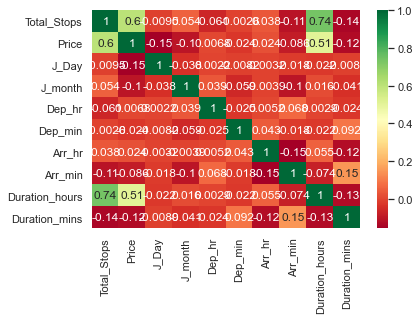

In [42]:
# Checking correlation of features using heatmap
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")
sns.set(rc={'figure.figsize':(35,35)})

In [43]:
# Select the X features for training
X = updated_trainData.loc[:, ['Total_Stops', 'J_Day', 'J_month', 'Dep_hr',
       'Dep_min', 'Arr_hr', 'Arr_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]
# Select the Y traget price
Y = updated_trainData.iloc[:,1]

In [44]:
# Selecting important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
imp_features = ExtraTreesRegressor()
imp_features.fit(X,Y)

ExtraTreesRegressor()

In [45]:
# print the lsit of important features for training the model
print(imp_features.feature_importances_)

[2.46955930e-01 1.43876582e-01 5.80722690e-02 2.32864371e-02
 2.07849974e-02 2.83013649e-02 1.87814845e-02 1.20587987e-01
 1.88339630e-02 8.25677319e-03 1.97181588e-03 1.64645178e-02
 1.37286883e-01 6.71647946e-02 1.94481047e-02 8.40033099e-04
 5.34571570e-03 1.20976281e-04 4.62351621e-03 6.57088086e-05
 6.13797839e-04 8.64524394e-03 4.85237304e-03 6.86684686e-03
 8.51007603e-03 1.79440867e-02 1.07414044e-02 7.56318102e-04]


<AxesSubplot:>

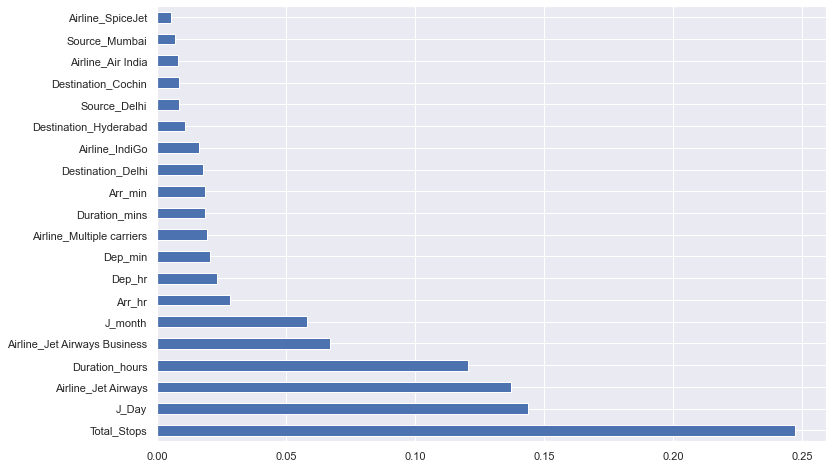

In [46]:
# Plotting the graph
sns.set(rc={'figure.figsize':(12,8)})
# plt.figure(figsize=(12,8))
important_features = pd.Series(imp_features.feature_importances_, index=X.columns)
important_features.nlargest(20).plot(kind="barh")
# plt.show()

## Model Fitting

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=40)

In [48]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regAlg = RandomForestRegressor()
regAlg.fit(X_train, Y_train)

RandomForestRegressor()

In [49]:
# Get the predictions
y_pred = regAlg.predict(X_test)

In [50]:
# Check the training score
regAlg.score(X_train, Y_train)

0.952290867689449

In [51]:
# Check the testing data
regAlg.score(X_test, Y_test)

0.8170360820543425

C:\Users\Akshat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

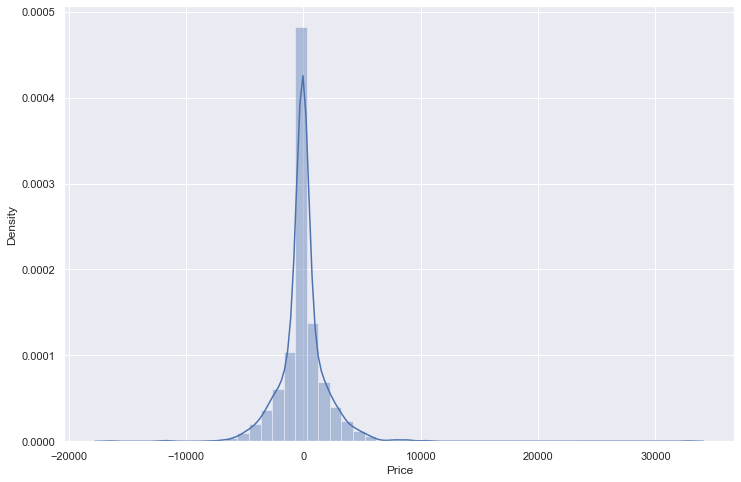

In [52]:
# Checking he distribution(Gaussain distribution)
sns.distplot(Y_test - y_pred)
plt.plot()

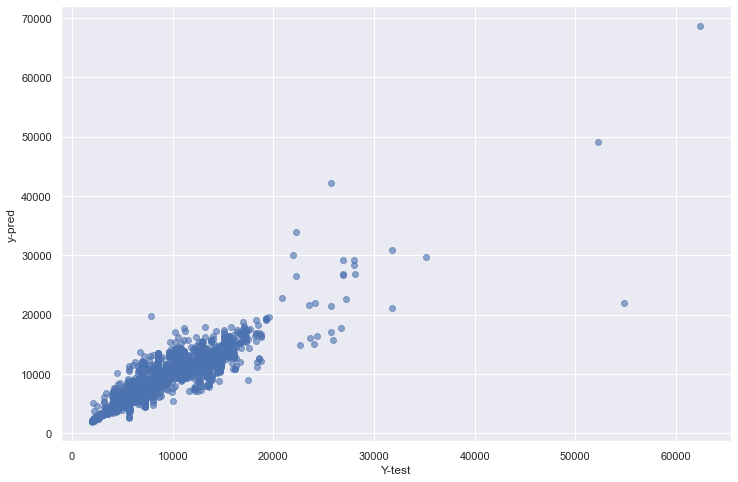

In [53]:
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.show()

In [54]:
# Evaluating the different metrics score and then later on checking it with the Hyperparameter tuning
from sklearn import metrics

In [55]:
print("MSE: ", metrics.mean_squared_error(Y_test,y_pred))
print("MAE: ", metrics.mean_absolute_error(Y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print("RMSLE: ", metrics.mean_squared_log_error(Y_test,y_pred))
print("R2_score: ", metrics.r2_score(Y_test,y_pred))

MSE:  4085652.531812192
MAE:  1188.8733747167016
RMSE:  2021.2997135042076
RMSLE:  0.034882670319439764
R2_score:  0.8170360820543425


## HyperParameter Tuning using RandomizedSeacrhCV

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Setting up the params list

# No.of trees in the Random Forest Regressor
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
# print(n_estimators)

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Min sample req to split anode
min_samplesReq_split = [2,5,10,15,20,100]

# Max depth of tree
max_depth = [int(x) for x in np.linspace(5,30,6)]

# Min samples at each node
min_samples_leaf = [1,2,5,10]

In [58]:
# Creating the randomised search grid
rand_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samplesReq_split,
            'min_samples_leaf': min_samples_leaf}

In [59]:
# Nnow find the best possible set of parameters using k cross validation where k=5
random_search = RandomizedSearchCV(estimator=regAlg, param_distributions=rand_grid, scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=40, n_jobs = 1)

In [60]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   7.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   7.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
# Get th best params and score
random_search.best_params_
# 
# random_search.best_score_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [62]:
# Best prediction
best_pred = random_search.predict(X_test)

C:\Users\Akshat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

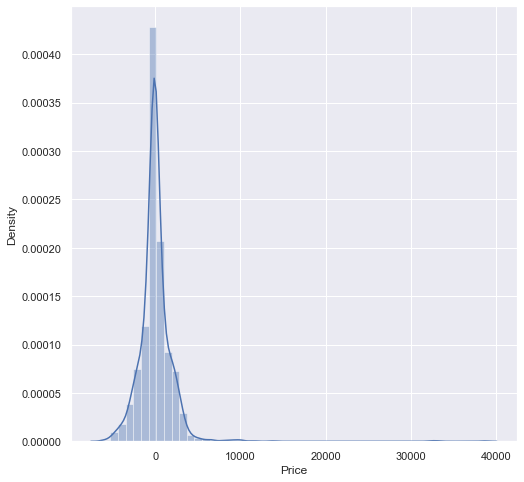

In [63]:
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(Y_test - best_pred)

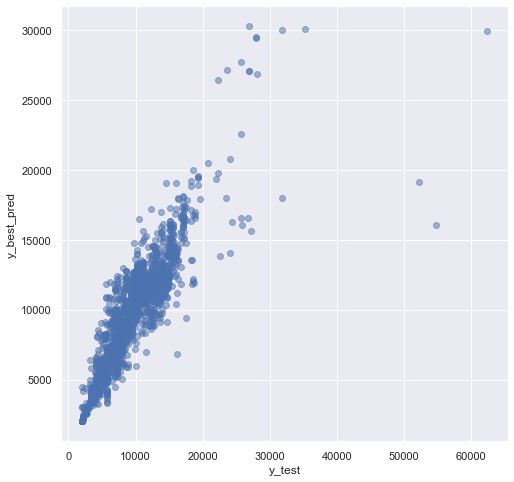

In [64]:
# Scatter plot of the same
plt.figure(figsize = (8,8))
plt.scatter(Y_test, best_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_best_pred")
plt.show()

In [65]:
# Print Evaluation metrics for the best params
print("MSE: ", metrics.mean_squared_error(Y_test,best_pred))
print("MAE: ", metrics.mean_absolute_error(Y_test,best_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,best_pred)))
print("RMSLE: ", metrics.mean_squared_log_error(Y_test,best_pred))
print("R2_score: ", metrics.r2_score(Y_test,best_pred))

MSE:  4629006.058860049
MAE:  1178.2246013104786
RMSE:  2151.5125049276494
RMSLE:  0.031067276916649015
R2_score:  0.7927035943148204


## Saving the model

In [66]:
import pickle

file = open('flightPredrf.pkl','wb')

# dump the info
pickle.dump(regAlg, file)

In [67]:
flight_model = open('flightPredrf.pkl','rb')
randomForest = pickle.load(flight_model)

In [68]:
y_predic = randomForest.predict(X_test)

In [69]:
metrics.r2_score(Y_test, y_predic)

0.8170360820543425